On Shopify, we have exactly 100 sneaker shops, and each of these shops sells only one model of shoe. We want to do some analysis of the average order value (AOV). When we look at orders data over a 30 day window, we naively calculate an AOV of $3145.13. Given that we know these shops are selling sneakers, a relatively affordable item, something seems wrong with our analysis. 

Think about what could be going wrong with our calculation. Think about a better way to evaluate this data. 
What metric would you report for this dataset?
What is its value?


# Analysis:


Average Order Value is defined as the average order amount per order for a particular merchant in a particular month.

AOV is a measure of central tendency which implies that it is not a robust metric against outliers or skewed distributions.

Right off the bat we see that there are a few factors that could factor into the metric.

For a fraction to be high, there can be 2 reasons, a relatively large numerator, or a relatively small denominator. This translates to really high monetary value for the average order or there are very few orders made.

Some reasons for high monetary order value might include bulk buying, maybe its start of month and customers got paid from their job, maybe a particular popular shop or user is filthy rich etc.

The small number of orders made could be because there is only free shipping after certain rate, there is a discount if you spend up to $X etc.




In [2]:
import pandas as pd
import plotly.express as px
#from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
data =pd.read_csv('/Users/school/2019 Winter Data Science Intern Challenge Data Set - Sheet1.csv')
data.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11


In [4]:
data.shape

(5000, 7)

In [5]:
data.dtypes

order_id           int64
shop_id            int64
user_id            int64
order_amount       int64
total_items        int64
payment_method    object
created_at        object
dtype: object

So we can see there are 5000 order instances.

In [6]:
data.isnull().values.any()

False

There are no missing values in this dataset

One potential area of interest is to see how the time series fit looks like, to do so we find the max and min of the orders


In [7]:
print(data['created_at'].min())
print(data['created_at'].max())

2017-03-01 0:08:09
2017-03-30 9:55:00


In [12]:
print(len(data.shop_id.unique()),len(data.user_id.unique()), len(data.total_items.unique()))
# so there are 100 unique shops and 301 unique users and 8 different congiurations of order items

100 301 8


In [13]:
data['total_items'].max()

2000

we see that the maximum order item is 2000, which suggests it might be an outlier. Or it might be the case that they are bulk buying.

count      5000.000000
mean       3145.128000
std       41282.539349
min          90.000000
25%         163.000000
50%         284.000000
75%         390.000000
max      704000.000000
Name: order_amount, dtype: float64


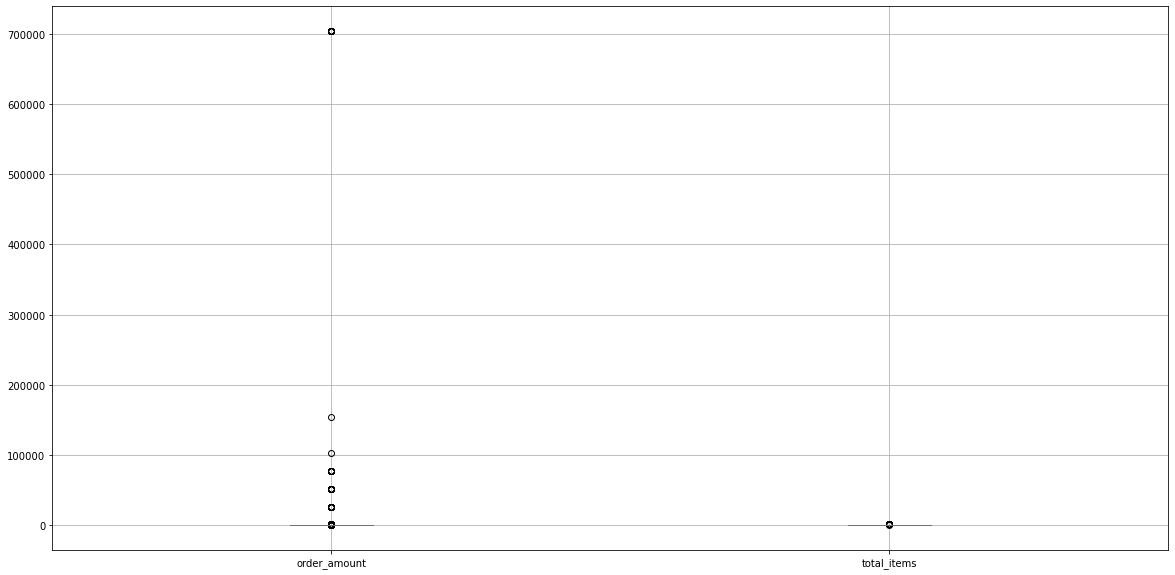

In [14]:
# We would also like to see the summary statistics, and the boxplot for continous variables for better visualzation
print(data.order_amount.describe())

fig = plt.figure(figsize =(20, 10))
 
boxplot = data.boxplot(column=['order_amount', 'total_items'])

# Time series

In [15]:
data['date'] = pd.to_datetime(data['created_at'], format="%Y-%m-%d %H")

In [16]:
data['date']

0      2017-03-13 12:36:56
1      2017-03-03 17:38:52
2      2017-03-14 04:23:56
3      2017-03-26 12:43:37
4      2017-03-01 04:35:11
               ...        
4995   2017-03-30 13:47:17
4996   2017-03-16 20:36:16
4997   2017-03-19 05:42:42
4998   2017-03-16 14:51:18
4999   2017-03-18 15:48:18
Name: date, Length: 5000, dtype: datetime64[ns]

In [23]:
new_df = data['date'].copy()

In [24]:
new_df

0      2017-03-13 12:36:56
1      2017-03-03 17:38:52
2      2017-03-14 04:23:56
3      2017-03-26 12:43:37
4      2017-03-01 04:35:11
               ...        
4995   2017-03-30 13:47:17
4996   2017-03-16 20:36:16
4997   2017-03-19 05:42:42
4998   2017-03-16 14:51:18
4999   2017-03-18 15:48:18
Name: date, Length: 5000, dtype: datetime64[ns]

In [25]:
data['Day'] = data['date'].apply(lambda x: x.day)
data['Hour'] = data['date'].apply(lambda x: x.hour)

In [ ]:
new_df['month'] = 3
new_df['year'] =2019
new_df = data.groupby(['Day','Hour',]).sum()['order_amount'].reset_index()

In [141]:
new_df

,Day,Hour,order_amount
0,1,0,3429
1,1,1,2436
2,1,2,606
3,1,3,54737
4,1,4,2521
...,...,...,...
714,30,19,3355
715,30,20,1265
716,30,21,2072
717,30,22,365


In [142]:


new_df
new_df.rename(columns={"Day": "day", "Hour": "hour", "order_amount":'amt'})
new_df['month'] = 3
new_df['year'] =2019
new_df = new_df[["year", "month", "Day","Hour","order_amount"]]
new_df.head()

new_df["Date-Time"] = pd.to_datetime(new_df.iloc[: , :4])


<ipython-input-142-7485ab8481d7>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df["Date-Time"] = pd.to_datetime(new_df.iloc[: , :4])


In [143]:
new_df

,year,month,Day,Hour,order_amount,Date-Time
0,2019,3,1,0,3429,2019-03-01 00:00:00
1,2019,3,1,1,2436,2019-03-01 01:00:00
2,2019,3,1,2,606,2019-03-01 02:00:00
3,2019,3,1,3,54737,2019-03-01 03:00:00
4,2019,3,1,4,2521,2019-03-01 04:00:00
...,...,...,...,...,...,...
714,2019,3,30,19,3355,2019-03-30 19:00:00
715,2019,3,30,20,1265,2019-03-30 20:00:00
716,2019,3,30,21,2072,2019-03-30 21:00:00
717,2019,3,30,22,365,2019-03-30 22:00:00


In [144]:
def seasonal_plot(X, y, period, freq, ax=None):
    if ax is None:
        _, ax = plt.subplots()
    palette = sns.color_palette("husl", n_colors=X[period].nunique(),)
    ax = sns.lineplot(
        x=freq,
        y=y,
        hue=period,
        data=X,
        ci=False,
        ax=ax,
        palette=palette,
        legend=False,
    )
    ax.set_title(f"Seasonal Plot ({period}/{freq})")
    for line, name in zip(ax.lines, X[period].unique()):
        y_ = line.get_ydata()[-1]
        ax.annotate(
            name,
            xy=(1, y_),
            xytext=(6, 0),
            color=line.get_color(),
            xycoords=ax.get_yaxis_transform(),
            textcoords="offset points",
            size=14,
            va="center",
        )
    return ax


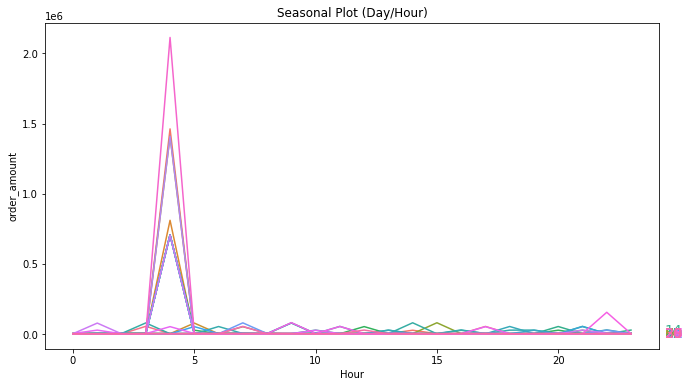

In [150]:

fig, ax0 = plt.subplots(1, 1, figsize=(11, 6))
seasonal_plot(new_df, y="order_amount", period="Day", freq="Hour", ax=ax0)

It is very clear that all these absurdly high spendings happens around 4 am in the morning regardless of day of week

In [153]:
fig = px.scatter(data, x="created_at",
                 y="order_amount", 
                 color="shop_id",log_x=False, 
                 size_max=60, template="plotly_dark",
                 hover_data=["payment_method", "total_items"],
                  labels={
                     "created_at": "Time",
                     "order_amount": "Order Amount (Dollars)",
                 },
                 title="Distribution of Sales" )

In [159]:
data_outlier = data[(data['order_amount'] >= 1000)]

In [156]:
data_outlier

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,date,Day,Hour
15,16,42,607,704000,2000,credit_card,2017-03-07 4:00:00,2017-03-07 04:00:00,7,4
60,61,42,607,704000,2000,credit_card,2017-03-04 4:00:00,2017-03-04 04:00:00,4,4
520,521,42,607,704000,2000,credit_card,2017-03-02 4:00:00,2017-03-02 04:00:00,2,4
691,692,78,878,154350,6,debit,2017-03-27 22:51:43,2017-03-27 22:51:43,27,22
1104,1105,42,607,704000,2000,credit_card,2017-03-24 4:00:00,2017-03-24 04:00:00,24,4
1362,1363,42,607,704000,2000,credit_card,2017-03-15 4:00:00,2017-03-15 04:00:00,15,4
1436,1437,42,607,704000,2000,credit_card,2017-03-11 4:00:00,2017-03-11 04:00:00,11,4
1562,1563,42,607,704000,2000,credit_card,2017-03-19 4:00:00,2017-03-19 04:00:00,19,4
1602,1603,42,607,704000,2000,credit_card,2017-03-17 4:00:00,2017-03-17 04:00:00,17,4
2153,2154,42,607,704000,2000,credit_card,2017-03-12 4:00:00,2017-03-12 04:00:00,12,4


From the above chart, focusing on the shop_id, user_id, order_amount, total_items, and Hour, it is reasonable to assume that there are 2 types of purchasing behaviour by 2 groups that composes the outliers in order_amount. In particular if we look at store 42, it seems like there is the same customer 607 ordering in bulk. However I am more inclined to think this is not a legitamate transaction as every time the order amount and total_items are identical which makes no sense even if you are shopping for a store. Furthermore, it seems like every order is purchased at around the same time at 4 on the dot which makes it seems like it is ran by a bot. Some reasons I can think of is potentially a hacker trying to "DDOS" a merchant.

With these reasons I believe it is fair to drop these outliers.

Now what might a better metric be? well it depends on the goal of the merchant and business, however once the outliers are removed, the AOV will be quite insightful for the merchants.

If you want a one size fit all solution consider the MEDIAN ORDER VALUE, as this metric is robust against outliers.

# SQL PORTION

# part a
SELECT COUNT(Orders.ShipperID)
FROM Orders
INNER JOIN Shippers ON Orders.ShipperID = Shippers.ShipperID
WHERE Shippers.ShipperName = 'Speedy Express'
;

=> 54

# part b
SELECT emp.LastName
FROM Employees emp
LEFT JOIN Orders ord 
ON emp.employeeID = ord.employeeID
GROUP BY ord.EmployeeID
Order by COUNT(ord.EmployeeID) Desc

=> Peacock


# part c) 
SELECT ProductName
FROM (
      SELECT Products.ProductName as ProductName, COUNT(Products.ProductName) as ProductCount
      FROM Orders
      JOIN Customers ON Orders.CustomerID=Customers.CustomerID
      JOIN OrderDetails ON Orders.OrderID=OrderDetails.OrderID
      JOIN Products ON Products.ProductID=OrderDetails.ProductID
      WHERE Country = 'Germany'
      GROUP BY Products.ProductName
      Order by COUNT(Products.ProductName) Desc
      );

Gorgonzola Telino